# KMeans + PCA + TSNE

**Goal:**

* To Classify the Bank Transactions using KMeans
* To Visualize the Clusters as best as possible using PCA & t-SNE

## Data setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Transaction_data.csv")
data.head(2)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35


In [4]:
data.shape

(2512, 16)

In [5]:
data.AccountID.nunique()

495

In [6]:
int_cols = data.select_dtypes(include = ["int64", "float64"]).columns

In [7]:
int_cols

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [8]:
df_int = data[int_cols]

In [9]:
df_int.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40


In [10]:
df_int.shape

(2512, 5)

In [11]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_int_std = pd.DataFrame(std_scaler.fit_transform(df_int), columns = df_int.columns)
df_int_std.head(2)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472


## KMeans

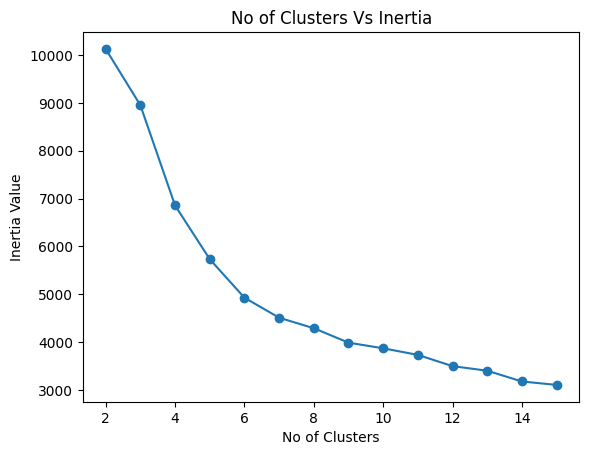

In [12]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, n_init = "auto", random_state = 42)
    kmeans.fit(df_int_std)
    inertia.append(kmeans.inertia_)

inertia_series = pd.Series(inertia, index = range(2, 16), name = "inertia_score")

plt.plot(inertia_series, marker = "o")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia Value")
plt.title("No of Clusters Vs Inertia")
plt.show();


**Note:**

The below could be **4** or **6**. Hence fitting for both.

In [13]:
# 4 Cluster Model

kmeans4 = KMeans(n_clusters = 4, n_init = "auto", random_state = 42)
kmeans4.fit(df_int_std)

kmeans4_labels = pd.Series(kmeans4.labels_, name = "kmeans4_labels")

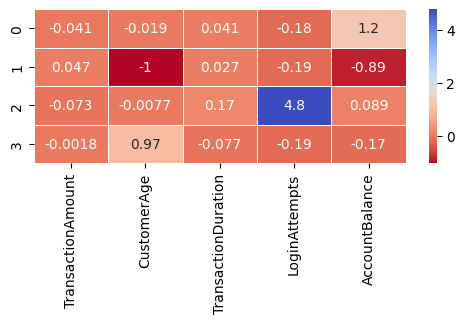

In [14]:
fig, ax = plt.subplots(figsize = (6,2))

ax = sns.heatmap(pd.DataFrame(kmeans4.cluster_centers_, columns =df_int_std.columns ), 
            annot = True,
            linecolor = "white",
            linewidth = 0.5,
            cmap = "coolwarm_r")

Interpreting **4 clusters**

* Cluster 0: High Login attempts
* Cluster 1: Transactions of Young Customers with Low Balance
* Cluster 2: Transactions of Senior Customers with High Balance
* Cluster 3: Transactions with High Amounts 

In [15]:
# 6 Cluster Model

kmeans6 = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
kmeans6.fit(df_int_std)

kmeans6_labels = pd.Series(kmeans6.labels_, name = "kmeans6_labels")

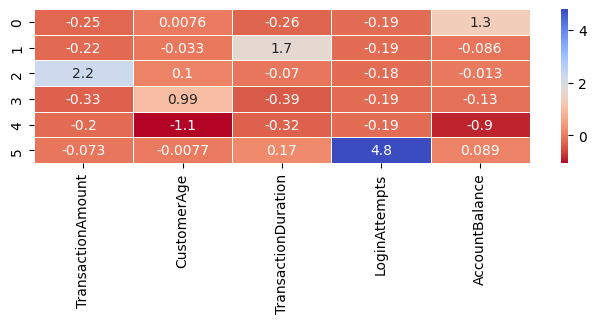

In [16]:
fig, ax = plt.subplots(figsize = (8,2))

ax = sns.heatmap(pd.DataFrame(kmeans6.cluster_centers_, columns =df_int_std.columns ), 
            annot = True,
            linecolor = "white",
            linewidth = 0.5,
            cmap = "coolwarm_r")

Interpreting **6 clusters**

* Cluster 0: Long Duration Transactions
* Cluster 1: Transactions of Young Customers with Low Balance
* Cluster 2: Transactions of Large Account Holders
* Cluster 3: Transactions involving High Amounts
* Cluster 4: High Login attempts
* Cluster 5: Transactions of Senior Customers 

**Note:**

Using KMeans 2 Models were identified to classify transactions.  
* Model 1: CLUSTERS = 4 
* Model 2: CLUSTERS = 6

**Visualization:**

To visualize, we have to reduce the 5 features down to 2 or 3. 

Firstly starting with **PCA for Feature Reduction**.

## PCA

In [17]:
# Fit for all features
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_int_std)


array([[ 1.10948312, -0.5488698 , -0.91365484,  0.00847205,  0.97532528],
       [ 2.42781601,  0.02096845,  0.64747306, -0.36955521, -0.62472038],
       [-1.654744  , -0.6987457 , -0.92788834,  0.37231682, -0.34591673],
       ...,
       [ 0.21897904,  0.13827138, -0.78163591, -0.59233265,  0.77936177],
       [-1.3896616 , -1.093703  , -0.80312812,  0.77019727, -0.33216818],
       [-1.69252195, -0.36452333, -0.43756782,  0.11559027,  0.05906463]])

In [18]:
pca.explained_variance_ratio_

array([0.264994  , 0.20667056, 0.19950213, 0.19300175, 0.13583156])

In [19]:
## find the no.of dims that together measure 80% of the variance

pca_evr = pca.explained_variance_ratio_
pca_evr

array([0.264994  , 0.20667056, 0.19950213, 0.19300175, 0.13583156])

In [20]:
cummulative_sum = pca_evr.cumsum()
cummulative_sum

array([0.264994  , 0.47166456, 0.67116669, 0.86416844, 1.        ])

In [21]:
# No of components to capture 80% of variance
dims_to_80 = np.argmax(cummulative_sum >= 0.8) + 1
print(dims_to_80)

4


**Use** this variable as input for the n_components argument in pca model

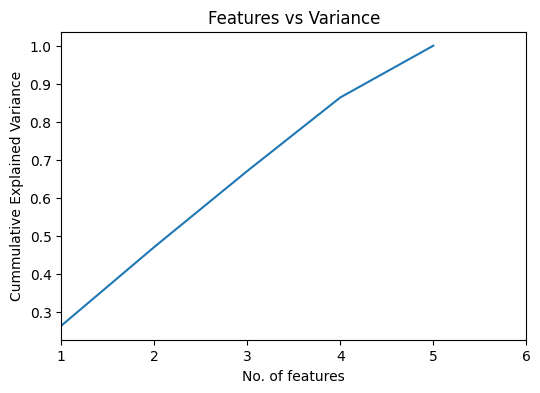

In [22]:
### Plot the variance

viz_evr = pd.Series(cummulative_sum, index = range(1,6,1), name = "Cummulative EVR")

plt.figure(figsize = (6, 4))
plt.plot(viz_evr)
plt.xlim(1,6)
plt.xlabel("No. of features")
plt.ylabel("Cummulative Explained Variance")
plt.title("Features vs Variance")
plt.show()

### Fit a 4 component PCA

In [23]:
## Fit a pca model with 4 components
pca4 = PCA(n_components = 4)
pca4.fit_transform(df_int_std)

pca4_df = pd.DataFrame(pca4.fit_transform(df_int_std), columns = ["component1", "component2", "component3", "component4"])


### Fit a 2 component PCA

In [24]:
pca2 = PCA(n_components = 2)
pca2.fit_transform(df_int_std)

pca2_df = pd.DataFrame(pca2.fit_transform(df_int_std), columns = ["component1", "component2"])


### Visualize PCA

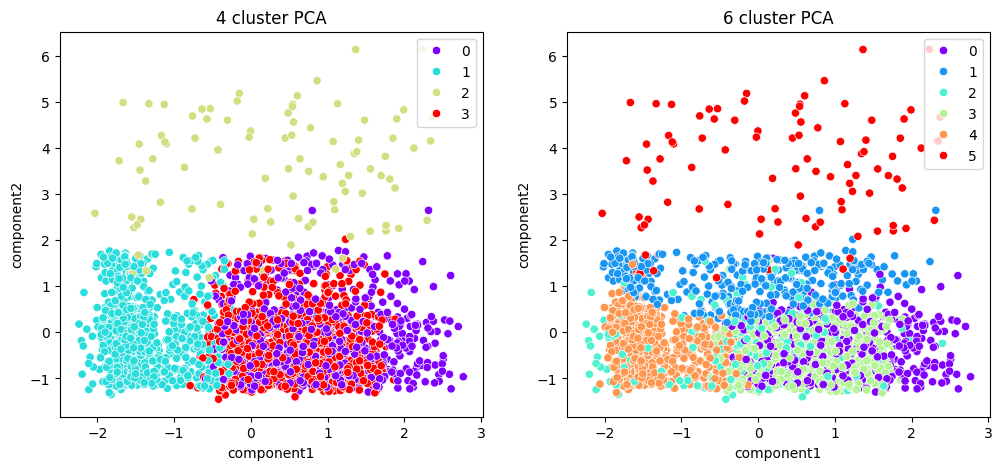

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x = pca2_df["component1"], y = pca2_df["component2"], hue = kmeans4_labels, palette = "rainbow", ax = axes[0])
sns.scatterplot(x = pca2_df["component1"], y = pca2_df["component2"], hue = kmeans6_labels, palette = "rainbow", ax = axes[1])

axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1))

axes[0].set_title("4 cluster PCA")
axes[1].set_title("6 cluster PCA")

plt.show();

## TSNE

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)

tsne_df = pd.DataFrame(tsne.fit_transform(df_int_std), columns = ["component1", "component2"])


In [27]:
tsne_df.head()

,component1,component2
0,11.404449,-34.353291
1,36.551662,12.432242
2,-44.291664,-13.480235
3,35.401947,-2.817324
4,20.742851,25.721104


#### Visualize 4 cluster model

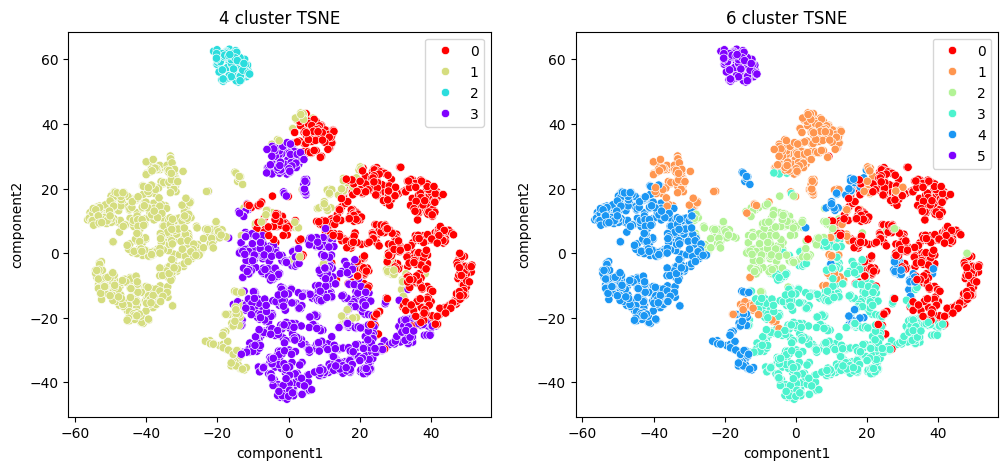

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x = tsne_df["component1"], y = tsne_df["component2"], hue = kmeans4_labels, palette = "rainbow_r", ax = axes[0])
sns.scatterplot(x = tsne_df["component1"], y = tsne_df["component2"], hue = kmeans6_labels, palette = "rainbow_r", ax = axes[1])

axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1))

axes[0].set_title("4 cluster TSNE")
axes[1].set_title("6 cluster TSNE")

plt.show();


## Observations

### 1. Final Clusters

In [29]:
## Silhouette Score

from sklearn.metrics import silhouette_score

ss4 = silhouette_score(df_int_std, kmeans4_labels, metric = "euclidean", sample_size = None)
ss6 = silhouette_score(df_int_std, kmeans6_labels, metric = "euclidean", sample_size = None)

print("4 Clusters: ", ss4)
print("6 Clusters: ", ss6)

4 Clusters:  0.24044069676383847
6 Clusters:  0.2624845436472968


Though 6 cluster model has slightly higher Silhouette Score the transactions are better grouped in the 4 Cluster Model.
Hence the final model will have 4 clusters.

**4 Clusters:**
* Cluster 0: High Login attempts
* Cluster 1: Transactions of Young Customers with Low Balance
* Cluster 2: Transactions of Senior Customers with High Balance
* Cluster 3: Transactions with High Amounts



### 2. Final Visual

Feature Reduction Techniques **PCA** and **T-SNE** both helped visualize the clusters.
1. PCA is technically representative of the variance in data
2. T-SNE makes it easy to visually observe the different clusters

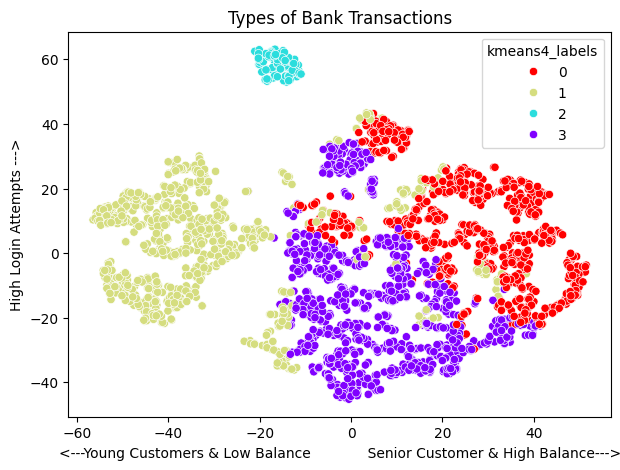

In [30]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = tsne_df["component1"], y = tsne_df["component2"], hue = kmeans4_labels, palette = "rainbow_r")

plt.title("Types of Bank Transactions")
plt.xlabel("<---Young Customers & Low Balance             Senior Customer & High Balance--->")
plt.ylabel("High Login Attempts --->")
plt.show()

In [31]:
## --- END OF ANALYSIS --- ##